## Business Problem Understanding:

            -- It is the data of an employee who is working in a Company in various departments.
            -- Based the below given requirements we are going to analyze the data.
                        1. How many people are there in each department?
                        2. Gender distribution by department
                        3. Age spread of our staff (histogram)
                        4. Min / max / average salary in each department
                        5. Top earners in each country
                        6. Performance Spread (sort by column)
                        7. Company growth trend
                        8. Employee Filter (by starting letter)
                        9. Performance vs. Salary - is there any relationship?
                        10. India vs. New Zealand - quick scorecard
                        

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("E:\\Haripriya\\NIT Classes\\hr-data.xlsx")
df.head()

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Parasuramudu Jamakayala,Male,20,Average,2020-10-18,Website,112650,IND
1,Yedukondalu Panditula,Male,32,Above average,2021-04-07,Website,43840,IND
2,Devsena Veluvalapalli,Female,31,Average,2022-04-12,Procurement,103550,IND
3,Gopal Venkata,Male,32,Average,2021-05-23,HR,45510,IND
4,Vasavi Veeravasarapu,Female,37,Poor,2020-09-11,Finance,115440,IND


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         183 non-null    object        
 1   Gender       183 non-null    object        
 2   Age          183 non-null    int64         
 3   Rating       183 non-null    object        
 4   Date Joined  183 non-null    datetime64[ns]
 5   Department   183 non-null    object        
 6   Salary       183 non-null    int64         
 7   Country      183 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 11.6+ KB


In [4]:
df.describe()

,Age,Salary
count,183.000000,183.000000
mean,30.426230,77173.715847
std,6.066823,24842.585100
min,19.000000,33920.000000
25%,27.000000,56980.000000
50%,30.000000,75000.000000
75%,34.000000,99970.000000
max,46.000000,119110.000000


In [5]:
df["Gender"].value_counts()

Male      92
Female    85
Other      6
Name: Gender, dtype: int64

In [6]:
df["Country"].value_counts()

IND    92
NZ     91
Name: Country, dtype: int64

In [7]:
df["Rating"].value_counts()

Average          137
Above average     20
Poor              16
Very poor          6
Exceptional        4
Name: Rating, dtype: int64

In [8]:
df["Department"].value_counts()

Procurement    55
Website        54
Finance        38
Sales          28
HR              8
Name: Department, dtype: int64

# Data Visualization:--

## 1.How many people are there in each department?

In [9]:
df["Department"].value_counts()

Procurement    55
Website        54
Finance        38
Sales          28
HR              8
Name: Department, dtype: int64

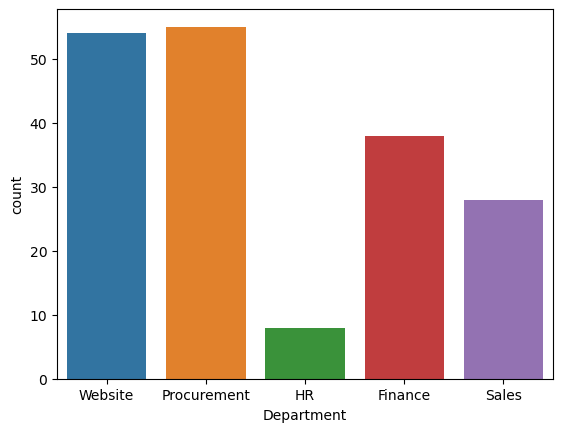

In [10]:
sns.countplot(x="Department",data=df)
plt.show()

## Visualization using PowerBI

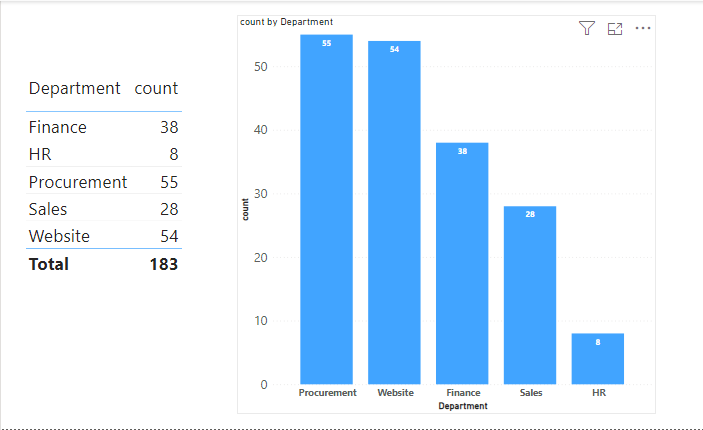

### The plot shows the more no. of people are in Procurment department and Website department 
### less no.of people in HR department

## 2.Gender distribution by department?

In [11]:
cross_tab = pd.crosstab(df["Department"],df["Gender"])
cross_tab

Gender,Female,Male,Other
Department,,,
Finance,19,16,3
HR,5,3,0
Procurement,23,32,0
Sales,11,17,0
Website,27,24,3


<Axes: xlabel='Department'>

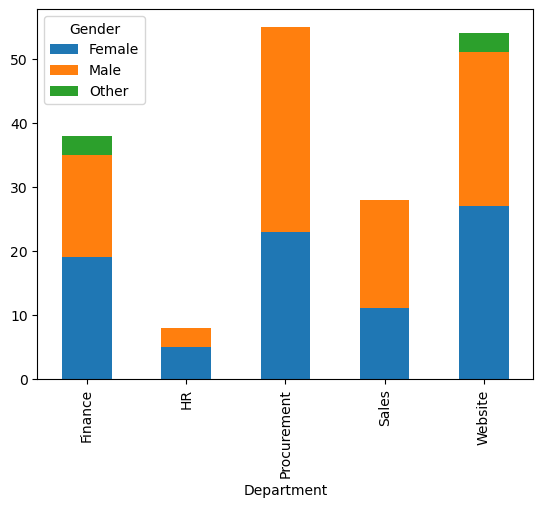

In [12]:
cross_tab.plot(kind="bar",stacked="True")

## Visualization using PowerBI

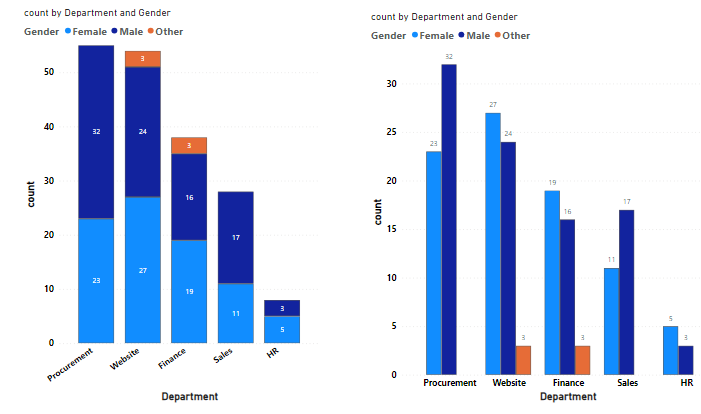

### As we can see in above plot more no. of females are working in Website department, Finance department and in HR department.
### And males are working more in number in Procurement department and in Sales department.
### so here we can say that more no. of females working in more departments.

## 3. Age spread of our staff (histogram)

In [13]:
df["Age"].value_counts()

33    20
30    18
28    14
27    13
34    11
36    10
32    10
21    10
20     8
25     8
37     8
31     8
40     6
24     6
26     5
38     4
22     4
42     4
29     4
43     3
35     2
23     2
19     2
46     2
44     1
Name: Age, dtype: int64

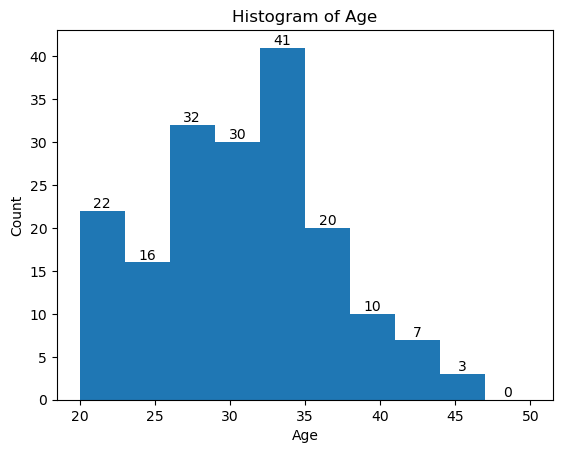

In [14]:
n,bins,patches=plt.hist(df["Age"],bins=10,range=(20,50))
plt.bar_label(patches)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age")
plt.show()

###  In between 28 - 35 aged people are more in number from the given dataset  

## 4. Min / max / average salary in each department

In [15]:
df.groupby("Department")["Salary"].agg(['min', 'max', 'mean'])

,min,max,mean
Department,,,
Finance,48170,115440,72472.631579
HR,45510,119110,89650.000000
Procurement,37920,115920,81794.000000
Sales,36040,112780,67866.428571
Website,33920,118840,78753.703704


## Visualization using PowerBI

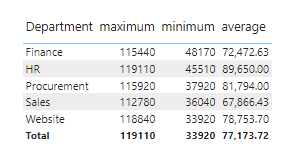

### HR department earns more salary than other 
### Sales department earns less salary than other 

## 5. Top earners in each country

In [16]:
df.loc[df.groupby('Country')['Salary'].idxmax()]

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country
36,Anjushri Chandiramani,Female,27,Average,2020-08-18,HR,119110,IND
101,Ewart Laphorn,Female,27,Average,2020-10-18,HR,119110,NZ


## Visualization using PowerBI

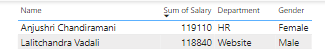

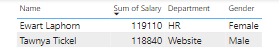

### The Top earns in each country are belongs to HR department and those are females

## 6.Performance Spread

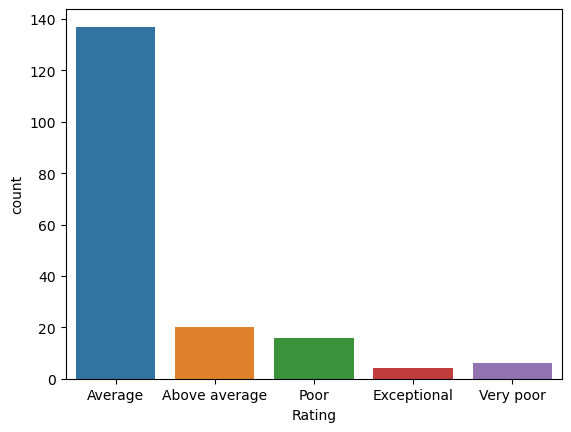

In [17]:
sns.countplot(x="Rating",data=df)
plt.show()

In [18]:
df["Rating"].value_counts()

Average          137
Above average     20
Poor              16
Very poor          6
Exceptional        4
Name: Rating, dtype: int64

## Visualization using PowerBI

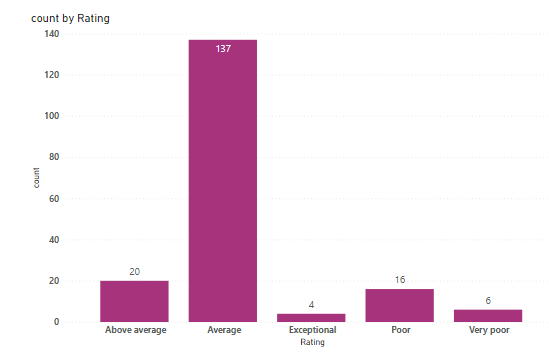

### Average people are more and earns more than exceptional

## 7.Company growth trend

In [19]:
df.columns

Index(['Name', 'Gender', 'Age', 'Rating', 'Date Joined', 'Department',
       'Salary', 'Country'],
      dtype='object')

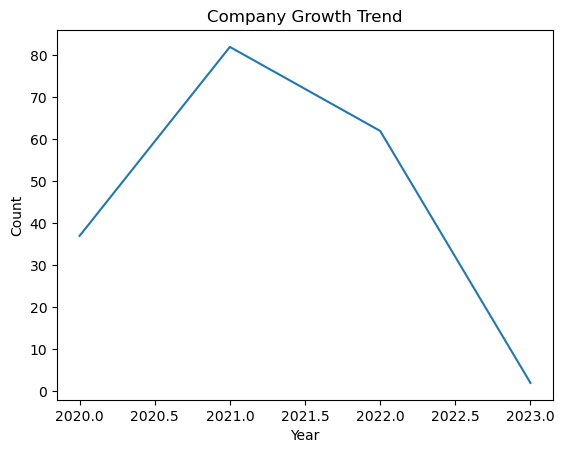

In [20]:
# Convert "Date Joined" to a datetime object
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

# Extract the year from the "Date Joined" column
df['Year'] = df['Date Joined'].dt.year

# Group by year and count the number of occurrences
count_by_year = df.groupby('Year').size().reset_index(name='Count')

# Plot the line plot
sns.lineplot(x='Year', y='Count', data=count_by_year)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Company Growth Trend')
plt.show()


## Visualization using PowerBI

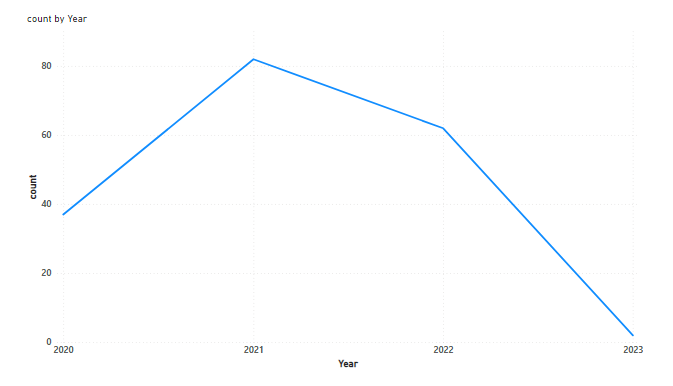

### The highest company's growth is in 2021 year 
### and it is  decreased in 2023 

## 8. Performance vs. Salary 

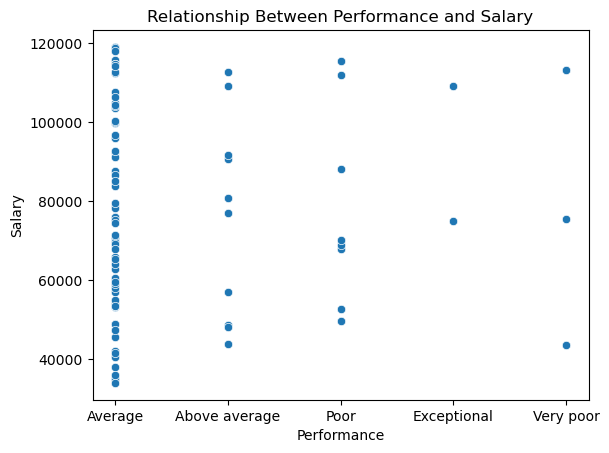

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns "Performance" and "Salary"
# You may have to adjust the column names based on your actual data
# For example, replace 'Performance' and 'Salary' with the actual column names from your DataFrame

# Scatter plot
sns.scatterplot(x='Rating', y='Salary', data=df)

# Set labels and title
plt.xlabel('Performance')
plt.ylabel('Salary')
plt.title('Relationship Between Performance and Salary')

# Show the plot
plt.show()


## Visualization using PowerBI

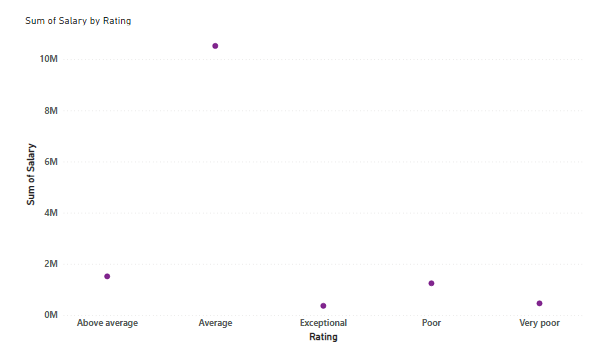

### India vs. New Zealand 

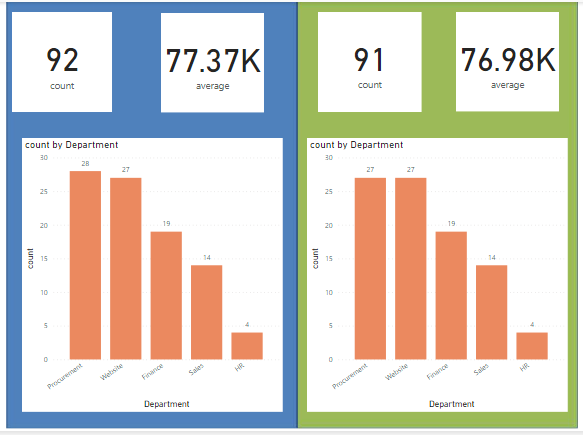

### In between India and New Zealand there is not much difference, the no. of people working in company is equal in two countries
### and the average salary of the workers are nearly equal in both the countries